# SELECCIÓN Y TRANSFORMACIÓN DE LOS DATOS

Se realizarán las siguientes actividades:
1. Selección atributos application_train
2. Transformación atributos dataset bureau
3. Transformación atributos dataset previous_application
3. Integración atributos y creación dataset final

### Carga de librerías

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(legacy='1.25')
import dtale as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

### Carga de ficheros

In [2]:
path = "../../data/preprocessed/"

df_app=pd.read_csv(os.path.join(path,'application_train_prep.csv'))
df_bur=pd.read_csv(os.path.join(path,'bureau_prep.csv'))
df_prev=pd.read_csv(os.path.join(path,'previous_application_prep.csv'))

Visualizamos datasets

In [3]:
print("Dataset application_train")
display(df_app)
print("Dataset bureau")
display(df_bur)
print("Dataset previous_application")
display(df_prev)

Dataset application_train


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
3,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
4,100016,0,Cash loans,F,N,Y,0,67500.0,80865.0,5881.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197342,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
197343,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
197344,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
197345,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Dataset bureau


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465320,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19
1465321,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493
1465322,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967
1465323,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508


Dataset previous_application


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,35,Connectivity,12.0,middle,POS mobile with interest,-42.0,-300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,-1,NaN,36.0,low_action,Cash X-Sell: low,-134.0,-916.0,NaN,NaN,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,-1,NaN,12.0,high,Cash X-Sell: high,-271.0,-59.0,NaN,NaN,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,-1,NaN,12.0,middle,Cash X-Sell: middle,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,-1,NaN,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131699,1662353,443544,Cash loans,12607.875,112500.0,112500.0,0.0,112500.0,MONDAY,10,...,100,NaN,12.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN
1131700,1556789,209732,Cash loans,22299.390,315000.0,436216.5,NaN,315000.0,THURSDAY,17,...,100,NaN,36.0,middle,Cash X-Sell: middle,-1249.0,-199.0,-919.0,-912.0,1.0
1131701,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,1370,Consumer electronics,10.0,low_normal,POS household with interest,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1131702,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,-1,NaN,12.0,low_normal,Cash X-Sell: low,-1155.0,-825.0,-825.0,-817.0,1.0


### 1. Selección de columnas application_train

Se realiza un estudio de correlación de las variables con TARGET y se tomarán las columnas más correlacionadas

#### 1.1 Transformación variables categóricas con One-Hot encoding

Para poder realizar un estudio de correlación se requiere que las variables sean numéricas. Por tanto binarizaremos las variables categóricas de application_train utilizando codificación One-Hot. Utilizaremos One-Hot encoding en lugar de Label Encoding puesto que este segundo método asigna un orden a los valores de las variables y los modelos de machine learning pueden interpretar una relación de orden entre los valores.

In [4]:
df_app.dtypes.value_counts()

float64    50
int64      40
object     15
Name: count, dtype: int64

Las variables categóricas son de tipo Object y las numéricas son int64 y float64

In [5]:
def onehot_encoding(df):
    # This function applies One-Hot encoding to categorical columns and keeps numerical columns.

    # Find categorical
    categorical_cols = df.select_dtypes(include=['object']).columns
    #numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Apply One-Hot to categorical columns
    df_onehot = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

    # Transform True/False values from to 0 y 1
    df_onehot  = df_onehot .applymap(lambda x: 1 if x is True else (0 if x is False else x))
    
    
    return df_onehot

In [6]:
# Applying One-Hot codification
df_app_onehot = onehot_encoding(df_app)

display(df_app_onehot)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,...,0,1,0,0,0,0,0,0,1,0
2,100009,0,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130.0,...,0,0,0,0,0,0,0,0,0,0
3,100014,0,1,112500.0,652500.0,21177.0,652500.0,0.022800,-10197,-679.0,...,0,0,0,0,0,0,0,0,0,0
4,100016,0,0,67500.0,80865.0,5881.5,67500.0,0.031329,-13439,-2717.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197342,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236.0,...,0,0,0,0,0,0,1,0,1,0
197343,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,NaN,...,0,0,0,0,0,0,1,0,1,0
197344,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921.0,...,0,0,0,0,0,1,0,0,1,0
197345,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786.0,...,0,0,0,0,0,0,1,0,1,0


In [7]:
# Verify all columns are numerical
df_app_onehot.dtypes.value_counts()

int64      174
float64     50
Name: count, dtype: int64

#### 1.2 Análisis correlación

In [8]:
def correlation(df, method_corr):
    # Calculate correlation matrix
    correlation_matrix = df.corr(method=method_corr)['TARGET']
    correlation_matrix = correlation_matrix.drop(labels=['TARGET'])
    return correlation_matrix

In [9]:
def top_correlations(df, num):
    # Get top num positive correlations
    top_positive = df[df > 0].sort_values(ascending=False).head(num)
    
    # Get top num negative correlations
    top_negative = df[df < 0].sort_values(ascending=True).head(num)

    # Concat top positive and negative correlations
    top_corr = pd.concat([top_positive,top_negative ])

    return top_corr

In [10]:
# Remove id column from df_app_onehot for correlation analysis
df_app_onehot.drop(columns='SK_ID_CURR', inplace=True)

##### 1.2.1 Análisis de correlación de Pearson


Se estudia la correlacion de application train con target. Utilizaremos la correlación de Pearson y de Spearman. Ninguna se ve afectada por la escala de los valores

In [11]:
correlation_pearson = correlation(df_app_onehot, 'pearson')
print(correlation_pearson)

CNT_CHILDREN                       0.015803
AMT_INCOME_TOTAL                  -0.000064
AMT_CREDIT                        -0.028895
AMT_ANNUITY                       -0.014298
AMT_GOODS_PRICE                   -0.037626
                                     ...   
WALLSMATERIAL_MODE_Panel          -0.026413
WALLSMATERIAL_MODE_Stone, brick    0.002288
WALLSMATERIAL_MODE_Wooden          0.015292
EMERGENCYSTATE_MODE_No            -0.027523
EMERGENCYSTATE_MODE_Yes            0.009745
Name: TARGET, Length: 222, dtype: float64


In [12]:
top_corr = top_correlations(correlation_pearson, 5)

print("Top Correlations:")
print(top_corr)

Top Correlations:
DAYS_BIRTH                              0.072540
DAYS_EMPLOYED                           0.069216
REGION_RATING_CLIENT_W_CITY             0.055490
REGION_RATING_CLIENT                    0.053588
CODE_GENDER_M                           0.050810
EXT_SOURCE_3                           -0.173750
EXT_SOURCE_1                           -0.154700
EXT_SOURCE_2                           -0.150785
NAME_EDUCATION_TYPE_Higher education   -0.055164
CODE_GENDER_F                          -0.050800
Name: TARGET, dtype: float64


Las variables que presentan una mayor correlación son DAYS_BIRTH, DAYS_EMPLOYED, EXT_SOURCE_3, EXT_SOURCE_1, EXT_SOURCE_2. No obstante, los valores de la correlación son próximos a 0, lo que indica que existe una baja dependencia lineal entre las variables. Hagamos un estudio de correlación de Spearman que estudia relaciones no lineales.

##### 1.2.2 Análisis correlación Spearman

In [13]:
correlation_spearman= correlation(df_app_onehot, 'spearman')
print(correlation_spearman)

CNT_CHILDREN                       0.016603
AMT_INCOME_TOTAL                  -0.017402
AMT_CREDIT                        -0.017354
AMT_ANNUITY                       -0.002586
AMT_GOODS_PRICE                   -0.030429
                                     ...   
WALLSMATERIAL_MODE_Panel          -0.026413
WALLSMATERIAL_MODE_Stone, brick    0.002288
WALLSMATERIAL_MODE_Wooden          0.015292
EMERGENCYSTATE_MODE_No            -0.027523
EMERGENCYSTATE_MODE_Yes            0.009745
Name: TARGET, Length: 222, dtype: float64


In [14]:
top_corr = top_correlations(correlation_spearman, 5)

print("Top Correlations:")
print(top_corr)

Top Correlations:
DAYS_EMPLOYED                           0.074611
DAYS_BIRTH                              0.072700
REGION_RATING_CLIENT_W_CITY             0.055476
REGION_RATING_CLIENT                    0.053583
CODE_GENDER_M                           0.050810
EXT_SOURCE_3                           -0.161377
EXT_SOURCE_1                           -0.150301
EXT_SOURCE_2                           -0.137451
NAME_EDUCATION_TYPE_Higher education   -0.055164
CODE_GENDER_F                          -0.050800
Name: TARGET, dtype: float64


Las variables que presentan una mayor correlación son DAYS_BIRTH, DAYS_EMPLOYED, EXT_SOURCE_3, EXT_SOURCE_1, EXT_SOURCE_2, como con la correlación de Pearson. No obstante, los valores de la correlación son próximos a 0, lo que puede indicar una baja dependencia.

##### 1.2.3 Conclusiones del análisis de correlación

De ambos análisis se concluye que las variables que presentan una mayor relación con la variable objetivo son DAYS_BIRTH, DAYS_EMPLOYED, EXT_SOURCE_3, EXT_SOURCE_1 y EXT_SOURCE_2. Consideramos estas variables como relevantes y las complementaremos con atributos creados a partir de los datasets bureau y previous_application

In [15]:
# NAME_CONTRACT_TYPE is also included because it is required for merge operations below
df_app_train = df_app[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'EXT_SOURCE_2']]
df_app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2
0,100002,1,Cash loans,-9461,-637.0,0.139376,0.083037,0.262949
1,100003,0,Cash loans,-16765,-1188.0,NaN,0.311267,0.622246
2,100009,0,Cash loans,-13778,-3130.0,0.492060,0.774761,0.724000
3,100014,0,Cash loans,-10197,-679.0,0.363945,0.319760,0.651862
4,100016,0,Cash loans,-13439,-2717.0,0.176653,0.464831,0.715042
...,...,...,...,...,...,...,...,...
197342,456251,0,Cash loans,-9327,-236.0,NaN,0.145570,0.681632
197343,456252,0,Cash loans,-20775,NaN,NaN,NaN,0.115992
197344,456253,0,Cash loans,-14966,-7921.0,0.218859,0.744026,0.535722
197345,456254,1,Cash loans,-11961,-4786.0,0.661024,NaN,0.514163


### 2. Transformación atributos bureau

    2.1. Cantidad de préstamos activos para cada cliente
    2.2. Cantidad de créditos solicitados en el último año
    2.3. Suma deuda total para cada cliente
    2.4. Avg de las prolongaciones solicitadas

#### 2.0. Comprobación de valores nulos en las columnas relevantes para los cálculos

Campos relevantes: CREDIT_ACTIVE, DAYS_CREDIT, AMT_CREDIT_SUM_DEBT, CNT_CREDIT_PROLONG

In [16]:
# Function to check the percentage of missing values
def missing_percentages(df):
    percentage_nulls = df.isnull().sum() / len(df) * 100
    return percentage_nulls

print(f"Percentatges of null values for each attribute:")
missing_percentage = missing_percentages(df_bur[['CREDIT_ACTIVE', 'DAYS_CREDIT', 'AMT_CREDIT_SUM_DEBT', 'CNT_CREDIT_PROLONG']])
print(missing_percentage)

Percentatges of null values for each attribute:
CREDIT_ACTIVE           0.000000
DAYS_CREDIT             0.000000
AMT_CREDIT_SUM_DEBT    15.224882
CNT_CREDIT_PROLONG      0.000000
dtype: float64


Observamos presencia de missing values en AMT_CREDIT_SUM_DEBT para créditos activos en bureau.

In [17]:
# Check if null values are present for ACTIVE credits
df_bur_group= df_bur[df_bur['AMT_CREDIT_SUM_DEBT'].isnull()].groupby(['CREDIT_ACTIVE']).size()
print("Distribution of rows with missing values on AML_CREDITS_SUM_DEBT per credit status")
display(df_bur_group)
cnt_active_null =len(df_bur[(df_bur['AMT_CREDIT_SUM_DEBT'].isnull()) & (df_bur['CREDIT_ACTIVE']=="Active")])
print(f"There exists a {round(100*cnt_active_null/df_bur.shape[0],2)}% of missing values on total debt for Active credits.")

Distribution of rows with missing values on AML_CREDITS_SUM_DEBT per credit status


CREDIT_ACTIVE
Active       65317
Bad debt         6
Closed      154663
Sold          3108
dtype: int64

There exists a 4.46% of missing values on total debt for Active credits.


Presencia baja de missing values on total debt. Se reemplaza por 0.

In [18]:
df_bur['AMT_CREDIT_SUM_DEBT']= df_bur['AMT_CREDIT_SUM_DEBT'].fillna(0)

# Revaluate nulls
print(f"Percentatges of null values for each attribute:")
missing_percentage = missing_percentages(df_bur[['CREDIT_ACTIVE', 'DAYS_CREDIT', 'AMT_CREDIT_SUM_DEBT', 'CNT_CREDIT_PROLONG']])
print(missing_percentage)

Percentatges of null values for each attribute:
CREDIT_ACTIVE          0.0
DAYS_CREDIT            0.0
AMT_CREDIT_SUM_DEBT    0.0
CNT_CREDIT_PROLONG     0.0
dtype: float64


#### 2.1. Cantidad de préstamos activos para cada cliente

In [19]:
# Check possible values for CREDIT_ACTIVE column

df_bur['CREDIT_ACTIVE'].unique()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

In [20]:
# Filter dataset to get ACTIVE credits
df_bur_active=df_bur.loc[df_bur['CREDIT_ACTIVE']=='Active']
df_bur_active_cnt=df_bur_active.groupby(['SK_ID_CURR']).size().reset_index(name='QTY_ACTIVE_BUREAU').sort_values(['QTY_ACTIVE_BUREAU'], ascending=False)
df_bur_active_cnt

,SK_ID_CURR,QTY_ACTIVE_BUREAU
139574,329272,32
30875,150685,22
165387,371490,22
27952,145911,20
56421,192716,19
...,...,...
217136,456235,1
217134,456233,1
26,100046,1
25,100045,1


In [21]:
# Check if nulls in new column
df_bur_active_cnt['QTY_ACTIVE_BUREAU'].isnull().sum() / len(df_bur_active_cnt) * 100

0.0

Exploramos las características de la nueva columna

In [22]:
print("Data type of QTY_ACTIVE_BUREAU:")
display(df_bur_active_cnt['QTY_ACTIVE_BUREAU'].dtype)

Data type of QTY_ACTIVE_BUREAU:


dtype('int64')

Frequency table


,QTY_ACTIVE_BUREAU,Frequency
0,1,74103
1,2,58383
2,3,38011
3,4,22041
4,5,12051
5,6,6107
6,7,3156
7,8,1648
8,9,780
9,10,425


Text(0.5, 0, 'Quantity of active credits in Bureau')

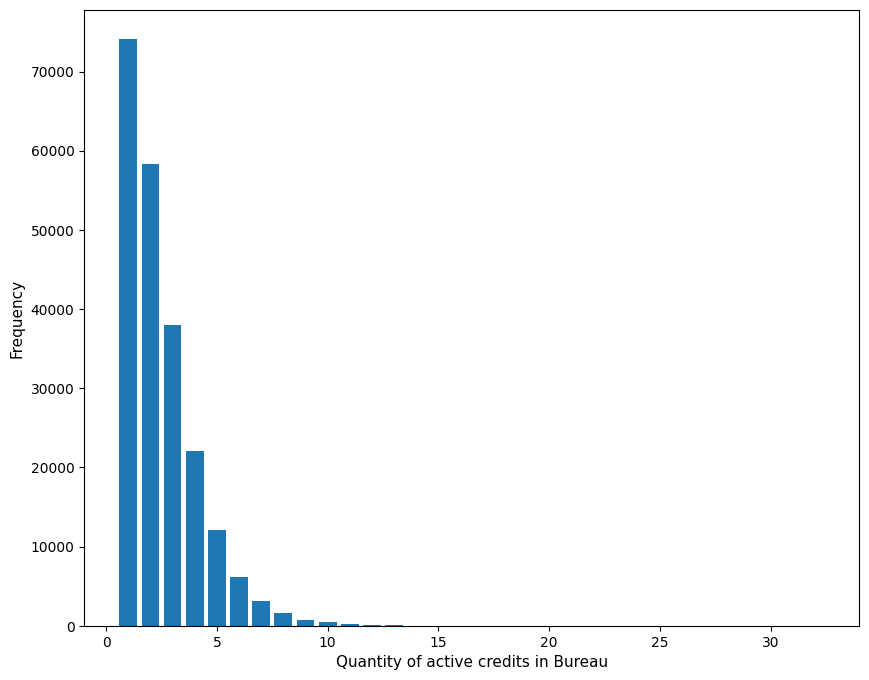

In [28]:
# Since the column is integer, study of frequency and bar plot
print("Frequency table")
active_cnt_freq=df_bur_active_cnt['QTY_ACTIVE_BUREAU'].value_counts().reset_index(name='Frequency').rename(columns={'index':'QTY_ACTIVE_BUREAU'}).sort_values(['QTY_ACTIVE_BUREAU'], ascending=True)
display(active_cnt_freq)

# Bar plot
plt.figure(figsize=[10,8])
plt.bar(active_cnt_freq['QTY_ACTIVE_BUREAU'], active_cnt_freq['Frequency'])
plt.ylabel('Frequency', fontsize=11)
plt.xlabel('Quantity of active credits in Bureau', fontsize=11)
#plt.title('Distribution of the quantity of active credits in Bureau per client')

In [29]:
df_bur_active_cnt['QTY_ACTIVE_BUREAU'].describe()

count    217150.000000
mean          2.495598
std           1.668271
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          32.000000
Name: QTY_ACTIVE_BUREAU, dtype: float64

#### 2.2. Cantidad de créditos solicitados en el último año

In [30]:
# Filter df_bur credits that were applied during the previous year to the current credit application
df_bur_last_year=df_bur[(df_bur['DAYS_CREDIT']<=0) & (df_bur['DAYS_CREDIT']>=-365)]


# Quantity of credits applied during the previous year per each current application
df_last_year_cnt=df_bur_last_year.groupby(['SK_ID_CURR']).size().reset_index(name='QTY_APP_LAST_YEAR').sort_values(['QTY_APP_LAST_YEAR'], ascending=False)
df_last_year_cnt

,SK_ID_CURR,QTY_APP_LAST_YEAR
8830,120860,80
64596,251643,34
51269,220625,34
145004,440512,30
146463,443969,30
...,...,...
151748,456226,1
151745,456215,1
16,100044,1
15,100041,1


In [31]:
# Check if nulls in new column
df_last_year_cnt['QTY_APP_LAST_YEAR'].isnull().sum() / len(df_last_year_cnt) * 100

0.0

Exploramos las características de la nueva columna

In [32]:
print("Data type of QTY_APP_LAST_YEAR:")
display(df_last_year_cnt['QTY_APP_LAST_YEAR'].dtype)

Data type of QTY_APP_LAST_YEAR:


dtype('int64')

Frequency table


,QTY_APP_LAST_YEAR,Frequency
0,1,81591
1,2,40344
2,3,16979
3,4,6994
4,5,2860
5,6,1287
6,7,655
7,8,340
8,9,201
9,10,129


Text(0.5, 0, 'Quantity of applications during last year')

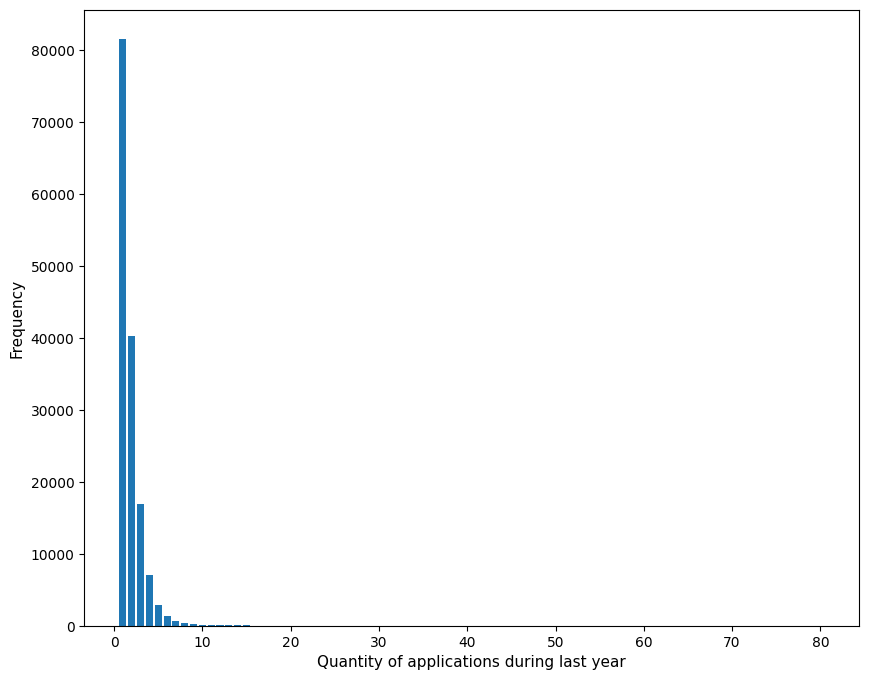

In [33]:
# Since the column is integer, study of frequency and bar plot
print("Frequency table")
lastyear_freq=df_last_year_cnt['QTY_APP_LAST_YEAR'].value_counts().reset_index(name='Frequency').rename(columns={'index':'QTY_APP_LAST_YEAR'}).sort_values(['QTY_APP_LAST_YEAR'], ascending=True)
display(lastyear_freq)

# Bar plot
plt.figure(figsize=[10,8])
plt.bar(lastyear_freq['QTY_APP_LAST_YEAR'], lastyear_freq['Frequency'])
plt.ylabel('Frequency',fontsize=11)
plt.xlabel('Quantity of applications during last year', fontsize=11)
#plt.title('Distribution of the quantity of applications during last year in Bureau per client')

In [34]:
df_last_year_cnt['QTY_APP_LAST_YEAR'].describe()

count    151762.000000
mean          1.839275
std           1.371349
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          80.000000
Name: QTY_APP_LAST_YEAR, dtype: float64

#### 2.3. Suma deuda total para cada cliente

In [35]:
# Aggregate total debt for active credits for each SK_ID_CURR
df_bur_total_debt=df_bur[df_bur['CREDIT_ACTIVE']=="Active"].groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum().reset_index(name='BUREAU_TOTAL_DEBT')
df_bur_total_debt

,SK_ID_CURR,BUREAU_TOTAL_DEBT
0,100002,245781.00
1,100003,0.00
2,100008,240057.00
3,100009,1077349.50
4,100010,348007.50
...,...,...
217145,456246,0.00
217146,456247,2193390.00
217147,456249,163071.00
217148,456253,1795833.00


In [36]:
# Check if nulls in new column
df_bur_total_debt['BUREAU_TOTAL_DEBT'].isnull().sum() / len(df_bur_total_debt) * 100

0.0

Exploramos las características de la nueva columna

In [37]:
print("Data type of BUREAU_TOTAL_DEBT:")
display(df_bur_total_debt['BUREAU_TOTAL_DEBT'].dtype)

Data type of BUREAU_TOTAL_DEBT:


dtype('float64')

Describe statistics


count    2.171500e+05
mean     7.653901e+05
std      1.753324e+06
min      0.000000e+00
25%      5.580000e+04
50%      2.761200e+05
75%      8.169750e+05
max      3.344983e+08
Name: BUREAU_TOTAL_DEBT, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

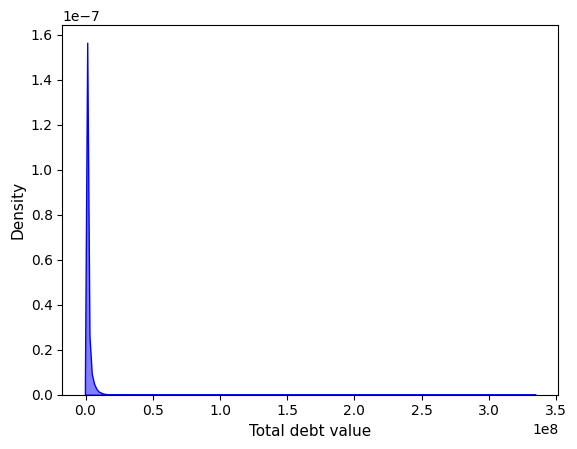

In [38]:
# Since the column is float, describe statistics and distribution plot
print("Describe statistics")
display(df_bur_total_debt['BUREAU_TOTAL_DEBT'].describe())

# KDE plot
sns.kdeplot(df_bur_total_debt['BUREAU_TOTAL_DEBT'], color='blue', shade=True, alpha=0.5)

# Labels
plt.ylabel('Density', fontsize=11)
plt.xlabel('Total debt value', fontsize=11)
#plt.title('Probability density distribution of accumulated debt in Bureau per each client')

# Print no labels to save plot for the document
#plt.ylabel('')
#plt.xlabel('')

plt.show

#### 2.4. Avg de las prolongaciones solicitadas

In [39]:
# Aggregate total average of credit prolongations for each SK_ID_CURR
df_bur_prolong=df_bur.groupby('SK_ID_CURR')['CNT_CREDIT_PROLONG'].mean().reset_index(name='AVG_PROLONGS').sort_values(['AVG_PROLONGS'], ascending=False)
df_bur_prolong

,SK_ID_CURR,AVG_PROLONGS
209275,382741,6.0
187838,353968,5.0
130500,276290,4.0
59167,179948,4.0
74875,201331,3.0
...,...,...
25,100036,0.0
24,100035,0.0
23,100033,0.0
22,100032,0.0


In [40]:
# Check if nulls in new column
df_bur_prolong['AVG_PROLONGS'].isnull().sum() / len(df_bur_prolong) * 100

0.0

Exploramos las características de la nueva columna

In [41]:
print("Data type of AVG_PROLONGS:")
display(df_bur_prolong['AVG_PROLONGS'].dtype)

Data type of AVG_PROLONGS:


dtype('float64')

Describe statistics


count    263491.000000
mean          0.007919
std           0.066479
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: AVG_PROLONGS, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

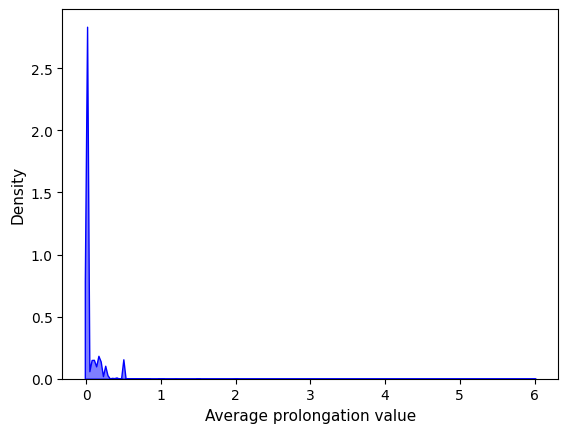

In [43]:
# Since the column is float, describe statistics and distribution plot
print("Describe statistics")
display(df_bur_prolong['AVG_PROLONGS'].describe())

# KDE plot
sns.kdeplot(df_bur_prolong['AVG_PROLONGS'], color='blue', shade=True, alpha=0.5)

# Labels
plt.ylabel('Density', fontsize=11)
plt.xlabel('Average prolongation value', fontsize=11)
#plt.title('Probability density distribution of credit prolongations in Bureau per each client')

# Print no labels to save plot for the document
#plt.ylabel('')
#plt.xlabel('')


plt.show

### 3. Transformación atributos previous_application

    3.1. Ratio de préstamos cancelados por tipo de préstamo y cliente
    3.2. Cantidad de tipos de préstamos diferentes solicitados por cliente
    3.3. Cantidad de crédito aprobada para mismo tipo de préstamo y cliente

#### 3.0. Comprobación de valores nulos en las columnas relevantes para los cálculos

In [44]:
print(f"Percentatges of null values for each attribute:")
missing_percentage = missing_percentages(df_prev[['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS', 'AMT_CREDIT']])
print(missing_percentage)

Percentatges of null values for each attribute:
NAME_CONTRACT_TYPE      0.0
NAME_CONTRACT_STATUS    0.0
AMT_CREDIT              0.0
dtype: float64


No se requiere realizar ninguna operación adicional de tratamiento de nulos para las columnas relevantes para la creación de nuevos atributos.

#### 3.1. Ratio de préstamos cancelados por tipo de préstamo y cliente

Grouping by NAME_CONTRACT_TYPE and SK_ID_CURR: count(NAME_CONTRACT_STATUS!=Approved)/total

In [45]:
#Possible values for NAME_CONTRACT_STATUS
df_prev['NAME_CONTRACT_STATUS'].unique()

array(['Approved', 'Refused', 'Unused offer', 'Canceled'], dtype=object)

In [46]:
# Count total applications per contract type and id
df_cnt = df_prev.groupby(['NAME_CONTRACT_TYPE', 'SK_ID_CURR']).size().reset_index(name='TOTAL_APPLICATIONS').sort_values(['TOTAL_APPLICATIONS'], ascending=False)

# Count total applications non-approved per contract type and id
# Create df only with non-approved applications
df_prev_non_aproved=df_prev.loc[df_prev['NAME_CONTRACT_STATUS']!="Approved"]
# Count number of rows grouping by contract type and id
df_non_app_cnt = df_prev_non_aproved.groupby(['NAME_CONTRACT_TYPE', 'SK_ID_CURR']).size().reset_index(name='APPLICATIONS_NONAPPROVED').sort_values(['APPLICATIONS_NONAPPROVED'], ascending=False)

# Merge total counts with counts for non-approval. 
df_cnt_merge=pd.merge(df_cnt, df_non_app_cnt, on=['NAME_CONTRACT_TYPE', 'SK_ID_CURR'], how='left')
# Fillna values with 0
df_cnt_merge=df_cnt_merge.fillna(value=0)

# Create proportion column
df_cnt_merge['RATIO_NONAPPROVED']=round(df_cnt_merge['APPLICATIONS_NONAPPROVED']/df_cnt_merge['TOTAL_APPLICATIONS'],4)
df_ratio_nonapproved=df_cnt_merge

display(df_ratio_nonapproved)

,NAME_CONTRACT_TYPE,SK_ID_CURR,TOTAL_APPLICATIONS,APPLICATIONS_NONAPPROVED,RATIO_NONAPPROVED
0,Cash loans,345161,51,51.0,1.0000
1,Consumer loans,336606,45,30.0,0.6667
2,Cash loans,408214,43,31.0,0.7209
3,Consumer loans,209029,42,37.0,0.8810
4,Cash loans,297331,42,34.0,0.8095
...,...,...,...,...,...
515581,Revolving loans,456126,1,0.0,0.0000
515582,Revolving loans,456125,1,0.0,0.0000
515583,Revolving loans,456124,1,0.0,0.0000
515584,Revolving loans,456121,1,0.0,0.0000


In [47]:
# Check if nulls in new column
df_ratio_nonapproved['RATIO_NONAPPROVED'].isnull().sum() / len(df_ratio_nonapproved) * 100

0.0

#### 3.2. Para el mismo tipo de préstamo y cliente, cantidad de tipos de préstamos diferentes solicitados: 

Grouping by SK_ID_CURR: NAME_CONTRACT_TYPE.unique

In [48]:
# Count total applications per contract type and id
df_unique_types = df_prev.groupby('SK_ID_CURR')['NAME_CONTRACT_TYPE'].nunique().reset_index(name='TOTAL_DIFFERENT_TYPES').sort_values(['TOTAL_DIFFERENT_TYPES'], ascending=False)
df_unique_types

,SK_ID_CURR,TOTAL_DIFFERENT_TYPES
290812,456235,3
19,100023,3
290799,456217,3
290796,456214,3
290795,456213,3
...,...,...
15,100019,1
14,100018,1
13,100017,1
12,100016,1


In [49]:
# Check if nulls in new column
df_unique_types['TOTAL_DIFFERENT_TYPES'].isnull().sum() / len(df_unique_types) * 100

0.0

#### 3.3. Suma de cantidad de crédito aprobada por cliente y tipo de préstamo: 
Grouping by NAME_CONTRACT_TYPE and SK_ID_CURR: AMT_CREDIT.sum

In [50]:
# Create df only with approved applications
df_prev_approved=df_prev.loc[df_prev['NAME_CONTRACT_STATUS']=="Approved"]
# Count number of rows grouping by contract type and id
df_approved_cnt = df_prev_approved.groupby(['NAME_CONTRACT_TYPE', 'SK_ID_CURR'])['AMT_CREDIT'].sum().reset_index(name='PREVIOUS_TOTAL_AMOUNT')
df_approved_cnt

,NAME_CONTRACT_TYPE,SK_ID_CURR,PREVIOUS_TOTAL_AMOUNT
0,Cash loans,100003,1035882.0
1,Cash loans,100006,1156495.5
2,Cash loans,100007,954553.5
3,Cash loans,100008,501975.0
4,Cash loans,100011,732915.0
...,...,...,...
480991,Revolving loans,456241,270000.0
480992,Revolving loans,456242,45000.0
480993,Revolving loans,456244,450000.0
480994,Revolving loans,456246,135000.0


In [51]:
# Check if nulls in new column
df_approved_cnt['PREVIOUS_TOTAL_AMOUNT'].isnull().sum() / len(df_approved_cnt) * 100

0.0

### 4. Integración de datos

#### 4.1 Construcción dataset integrado

In [52]:
# Merge with new attributes from bureau
df_app_train = pd.merge(df_app_train, df_bur_active_cnt, on='SK_ID_CURR', how='left' )
df_app_train = pd.merge(df_app_train, df_last_year_cnt, on='SK_ID_CURR', how='left' )
df_app_train = pd.merge(df_app_train, df_bur_total_debt, on='SK_ID_CURR', how='left' )
df_app_train = pd.merge(df_app_train, df_bur_prolong, on='SK_ID_CURR', how='left' )

# Merge with new attributes from previous_application
df_app_train = pd.merge(df_app_train, df_ratio_nonapproved[['SK_ID_CURR','NAME_CONTRACT_TYPE','RATIO_NONAPPROVED']], on=['SK_ID_CURR', 'NAME_CONTRACT_TYPE'], how='left' )
df_app_train = pd.merge(df_app_train, df_unique_types, on='SK_ID_CURR', how='left' )
df_app_train = pd.merge(df_app_train, df_approved_cnt, on=['SK_ID_CURR', 'NAME_CONTRACT_TYPE'], how='left' )

display(df_app_train)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,QTY_ACTIVE_BUREAU,QTY_APP_LAST_YEAR,BUREAU_TOTAL_DEBT,AVG_PROLONGS,RATIO_NONAPPROVED,TOTAL_DIFFERENT_TYPES,PREVIOUS_TOTAL_AMOUNT
0,100002,1,Cash loans,-9461,-637.0,0.139376,0.083037,0.262949,2.0,1.0,245781.00,0.000000,NaN,1.0,NaN
1,100003,0,Cash loans,-16765,-1188.0,NaN,0.311267,0.622246,1.0,NaN,0.00,0.000000,0.00,2.0,1035882.0
2,100009,0,Cash loans,-13778,-3130.0,0.492060,0.774761,0.724000,4.0,1.0,1077349.50,0.000000,NaN,1.0,NaN
3,100014,0,Cash loans,-10197,-679.0,0.363945,0.319760,0.651862,2.0,NaN,758214.00,0.000000,NaN,1.0,NaN
4,100016,0,Cash loans,-13439,-2717.0,0.176653,0.464831,0.715042,4.0,4.0,63724.50,0.000000,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197342,456251,0,Cash loans,-9327,-236.0,NaN,0.145570,0.681632,NaN,NaN,NaN,NaN,NaN,1.0,NaN
197343,456252,0,Cash loans,-20775,NaN,NaN,NaN,0.115992,NaN,NaN,NaN,NaN,NaN,1.0,NaN
197344,456253,0,Cash loans,-14966,-7921.0,0.218859,0.744026,0.535722,2.0,NaN,1795833.00,0.000000,NaN,1.0,NaN
197345,456254,1,Cash loans,-11961,-4786.0,0.661024,NaN,0.514163,NaN,NaN,NaN,0.000000,NaN,1.0,NaN


In [53]:
df_app_train.dtypes

SK_ID_CURR                 int64
TARGET                     int64
NAME_CONTRACT_TYPE        object
DAYS_BIRTH                 int64
DAYS_EMPLOYED            float64
EXT_SOURCE_3             float64
EXT_SOURCE_1             float64
EXT_SOURCE_2             float64
QTY_ACTIVE_BUREAU        float64
QTY_APP_LAST_YEAR        float64
BUREAU_TOTAL_DEBT        float64
AVG_PROLONGS             float64
RATIO_NONAPPROVED        float64
TOTAL_DIFFERENT_TYPES    float64
PREVIOUS_TOTAL_AMOUNT    float64
dtype: object

Integración correcta: df_app_train presenta las mismas filas tras integrar las columnas nuevas (197347)

#### 4.2. Estudio valores nulos

In [54]:
print(f"Percentatges of null values for each attribute:")
missing_percentage = missing_percentages(df_app_train)
print(missing_percentage)

Percentatges of null values for each attribute:
SK_ID_CURR                0.000000
TARGET                    0.000000
NAME_CONTRACT_TYPE        0.000000
DAYS_BIRTH                0.000000
DAYS_EMPLOYED            14.102064
EXT_SOURCE_3             15.297420
EXT_SOURCE_1             44.167380
EXT_SOURCE_2              0.158604
QTY_ACTIVE_BUREAU        25.581336
QTY_APP_LAST_YEAR        47.849727
BUREAU_TOTAL_DEBT        25.581336
AVG_PROLONGS             10.822561
RATIO_NONAPPROVED        53.923292
TOTAL_DIFFERENT_TYPES     5.961074
PREVIOUS_TOTAL_AMOUNT    59.287448
dtype: float64


Se observan valores nulos especialmente en las columnas creadas a partir de los datasets bureau y previous_application. Esto puede deberse por la existencia de población desbancarizada. Comprobamos la cantidad de SK_ID_CURR que no están presentes en los históricos de bureau y previous application.

In [56]:
def ids_consistency(df1, df2, id_column):
    # Create sets with unique keys from both dfs
    ids_df1 = set(df1[id_column].unique())
    ids_df2 = set(df2[id_column].unique())
    
    # Find SK_ID_CURR in df1 that are not in df2
    not_matching_ids=list(set(ids_df1) - set(ids_df2))
 
    return round(100*len(not_matching_ids)/len(ids_df1),2)


print(f"\nDataset application_train against bureau:")
res=ids_consistency(df_app_train, df_bur, 'SK_ID_CURR')
print(f"Percentage of ids present in application_train (preprocessed) not matching ids in bureau: {res}")

print(f"\nDataset application_train against previous_application:")
res=ids_consistency(df_app_train, df_prev, 'SK_ID_CURR')
print(f"Percentage of ids present in application_train (preprocessed) not matching ids in previous_application: {res}")


Dataset application_train against bureau:
Percentage of ids present in application_train (preprocessed) not matching ids in bureau: 10.82

Dataset application_train against previous_application:
Percentage of ids present in application_train (preprocessed) not matching ids in previous_application: 5.96


Se verifica que los valores nulos se producen por los clientes desbancarizados. Nótese que AVG_PROLONGS presenta un 10.89% de nulos, que coincide con le porcentaje de SK_ID_CURR presentes en application_train (preprocesado) y no en bureau. Ídem para TOTAL_DIFFERENT_TYPES procedente de previous_application. El resto de columnas presentan un porcentaje mayor de nulos puesto que se calculan filtrando características concretas, por ejemplo, créditos activos en QTY_ACTIVE_BUREAU.

Según el significado de cada columna, se rellenan los missing values de diferentes maneras:
- Todas las columnas procedentes de bureau y previous_application: se rellena con 0 puesto que no existen créditos previos.
- DAYS_EMPLOYED: si es nulo se puede entender que la persona no tiene empleo. Se rellena con 0.
- EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3: se rellenan con la media del resto de valores.

In [57]:
for col in ['QTY_ACTIVE_BUREAU' ,'QTY_APP_LAST_YEAR' ,'BUREAU_TOTAL_DEBT' ,'AVG_PROLONGS' ,'RATIO_NONAPPROVED' ,'TOTAL_DIFFERENT_TYPES' ,'PREVIOUS_TOTAL_AMOUNT', 'DAYS_EMPLOYED']:
    df_app_train[col].fillna(value=0, inplace=True)

for col in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
    mean_value = df_app_train[col].mean() 
    df_app_train[col].fillna(value=mean_value, inplace=True)

In [58]:
# Revaluate missing values
print(f"Percentatges of null values for each attribute:")
missing_percentage = missing_percentages(df_app_train)
print(missing_percentage)

Percentatges of null values for each attribute:
SK_ID_CURR               0.0
TARGET                   0.0
NAME_CONTRACT_TYPE       0.0
DAYS_BIRTH               0.0
DAYS_EMPLOYED            0.0
EXT_SOURCE_3             0.0
EXT_SOURCE_1             0.0
EXT_SOURCE_2             0.0
QTY_ACTIVE_BUREAU        0.0
QTY_APP_LAST_YEAR        0.0
BUREAU_TOTAL_DEBT        0.0
AVG_PROLONGS             0.0
RATIO_NONAPPROVED        0.0
TOTAL_DIFFERENT_TYPES    0.0
PREVIOUS_TOTAL_AMOUNT    0.0
dtype: float64


#### 4.3. Estudio de correlación del dataset final

In [59]:
def correlation_all(df, method_corr):
    correlation_matrix = df.corr(method=method_corr)
    return correlation_matrix

In [60]:
df_train_corr=df_app_train.drop(columns=['SK_ID_CURR','NAME_CONTRACT_TYPE'])
df_train_corr

,TARGET,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,QTY_ACTIVE_BUREAU,QTY_APP_LAST_YEAR,BUREAU_TOTAL_DEBT,AVG_PROLONGS,RATIO_NONAPPROVED,TOTAL_DIFFERENT_TYPES,PREVIOUS_TOTAL_AMOUNT
0,1,-9461,-637.0,0.139376,0.083037,0.262949,2.0,1.0,245781.00,0.000000,0.00,1.0,0.0
1,0,-16765,-1188.0,0.507626,0.311267,0.622246,1.0,0.0,0.00,0.000000,0.00,2.0,1035882.0
2,0,-13778,-3130.0,0.492060,0.774761,0.724000,4.0,1.0,1077349.50,0.000000,0.00,1.0,0.0
3,0,-10197,-679.0,0.363945,0.319760,0.651862,2.0,0.0,758214.00,0.000000,0.00,1.0,0.0
4,0,-13439,-2717.0,0.176653,0.464831,0.715042,4.0,4.0,63724.50,0.000000,0.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197342,0,-9327,-236.0,0.507626,0.145570,0.681632,0.0,0.0,0.00,0.000000,0.00,1.0,0.0
197343,0,-20775,0.0,0.507626,0.501328,0.115992,0.0,0.0,0.00,0.000000,0.00,1.0,0.0
197344,0,-14966,-7921.0,0.218859,0.744026,0.535722,2.0,0.0,1795833.00,0.000000,0.00,1.0,0.0
197345,1,-11961,-4786.0,0.661024,0.501328,0.514163,0.0,0.0,0.00,0.000000,0.00,1.0,0.0


In [61]:
correlation_pearson_all= correlation_all(df_train_corr, 'pearson')
#display(correlation_pearson_all)

correlation_spearman_all= correlation_all(df_train_corr, 'spearman')
#display(correlation_spearman_all)

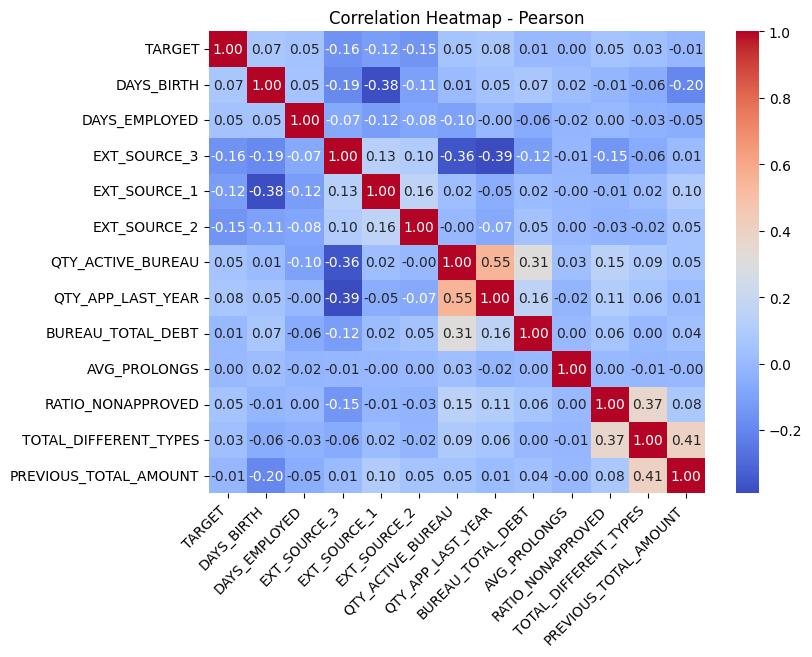

In [66]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(correlation_pearson_all, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap - Pearson')
plt.xticks(rotation=45, ha="right")
#plt.tight_layout()
plt.show()

- AVG_PROLONGS, BUREAU_TOTAL_DEBT, TOTAL_DIFFERENT_TYPES, PREVIOUS_TOTAL_AMOUNT muestran una relación muy débil con TARGET. Se podría evaluar suprimirlas. Comprobaremos con la correlación de Spearman.
- Los siguientes pares de variables muestran los mayores valores de correlación. Se podría evaluar tomar las más correlacionadas con TARGET.
    - EXT_SOURCE_1 y DAYS_BIRTH
    - QTY_ACTIVE_BUREAU y EXT_SOURCE_3
    - QTY_APP_LAST_YEAR y EXT_SOURCE_3

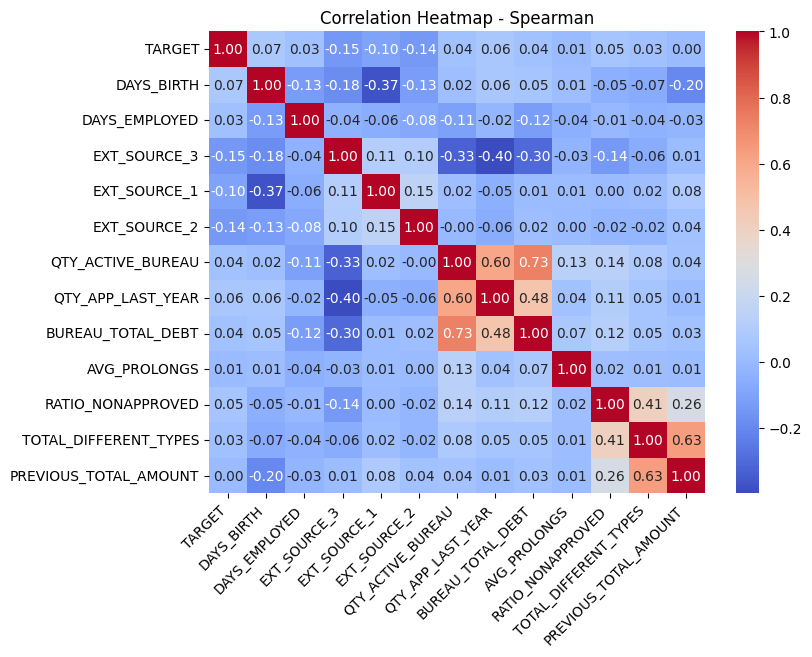

In [65]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(correlation_spearman_all, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap - Spearman')
plt.xticks(rotation=45, ha="right")
#plt.tight_layout()
plt.show()

A diferencia de los resultados de la correlación de Pearson, las variables AVG_PROLONGS, BUREAU_TOTAL_DEBT muestran una mayor correlación aunque no suficientemente fuerte. Por tanto, se eliminan.

En general, los valores de correlación son mayores con el método de Pearson, por tanto lo tomamos como referencia. Se suprimen las variables que presentan una correlación entre ]-0,05, 0,05[.

In [67]:
cols_to_delete=list(correlation_pearson_all[(correlation_pearson_all['TARGET']<0.05) & (correlation_pearson_all['TARGET']>-0.05)].index)


In [68]:
# Adding to cols to delete ID and NAME_CONTRACT_TYPE used for merge operations
cols_to_delete.extend(['SK_ID_CURR', 'NAME_CONTRACT_TYPE'])
df_app_train.drop(columns=cols_to_delete, inplace=True)

### 5. Export final dataset

Exploración dataset application_train final (preprocesado)

In [71]:
dtale_df = dt.show(df_app_train)
dtale_df.open_browser()

In [ ]:
df_app_train.to_csv("../../data/final/df_train_final.csv", index=False)

2024-11-22 12:10:19,836 - INFO     - Executing shutdown due to inactivity...
2024-11-22 12:10:23,986 - INFO     - Executing shutdown...
2024-11-22 12:10:23,999 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer
